Kernel : base (Python 3.9.7) conda environnement

# I. INSTALLER ENVIRONNEMENT DE TRAVAIL

Installer packages/librairies nécessaires

In [62]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import os
from os import listdir
import missingno as msno
from zipfile import ZipFile
import requests
import math
%matplotlib inline
from PIL import Image

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics.cluster import adjusted_rand_score

from sklearn import (manifold, datasets, decomposition, ensemble,discriminant_analysis, random_projection)
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score
from matplotlib import offsetbox

from glob import glob
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, GlobalAveragePooling1D, Flatten, Dense, Dropout 
from tensorflow.keras.layers import Rescaling, RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

import time
import cv2 as cv

from plot_keras_history import show_history, plot_history

In [2]:
# palette
jaune ='#FFCA18'
rouge ='#88001B'
bleu ='#000064'
vert ='#055D00'
pink = '#FC6C85'
choco = '#4b2312'
cyan = '#00FFFF'
orange = '#FF6103'
magenta = '#FF00FF'
pastel = ['#FFE06F','#FF9594','#78CF80','#FFB178','#A7B9FF','#FDE8D8']
pastel2 = [rouge, jaune, bleu, pink, vert, choco, cyan, orange, magenta]

Definir l'environnement de travail

In [3]:
path_to_dir=os.path.abspath(os.getcwd())

# II. Read csv file and create df

In [4]:
df = pd.read_csv('Flipkart/flipkart_com-ecommerce_sample_1050.csv', sep=',',quotechar='"')

/!\ create feature category

In [5]:
def category(table = df):
    df2 = table.copy()
    df2.insert(5, 'Category', df2['product_category_tree'])
    df2['Category'] = df2['Category'].apply(lambda x : x.split(" >>", 1)[0])
    df2['Category'] = df2['Category'].str.replace('"', '')
    df2['Category'] = df2['Category'].str.replace('[', '')
    return df2

In [6]:
df2 = category()

C:\Users\denis\AppData\Local\Temp/ipykernel_28772/1584325956.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df2['Category'] = df2['Category'].str.replace('[', '')


/!\ Remove useless columns

In [7]:
to_keep = ["Category", 'image']

In [8]:
df2.head(3)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,Category,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",Home Furnishing,CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",Baby Care,BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",Baby Care,BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."


In [9]:
df3 = df2.drop(columns=[ele for ele in df2.columns if ele not in to_keep])

In [10]:
df3.head(3)

,Category,image
0,Home Furnishing,55b85ea15a1536d46b7190ad6fff8ce7.jpg
1,Baby Care,7b72c92c2f6c40268628ec5f14c6d590.jpg
2,Baby Care,64d5d4a258243731dc7bbb1eef49ad74.jpg


In [11]:
df3.Category.unique()

array(['Home Furnishing', 'Baby Care', 'Watches',
       'Home Decor & Festive Needs', 'Kitchen & Dining',
       'Beauty and Personal Care', 'Computers'], dtype=object)

In [12]:
df3.shape, df3.image.nunique()

((1050, 2), 1050)

In [13]:
df4 = df3.copy()

In [14]:
df4['Class'] = df4.Category

In [15]:
df4.head(3)

,Category,image,Class
0,Home Furnishing,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Home Furnishing
1,Baby Care,7b72c92c2f6c40268628ec5f14c6d590.jpg,Baby Care
2,Baby Care,64d5d4a258243731dc7bbb1eef49ad74.jpg,Baby Care


In [16]:
dico2 = {}
for i, j in enumerate(df4.Category.unique()):
    dico2[j] = i
dico2

{'Home Furnishing': 0,
 'Baby Care': 1,
 'Watches': 2,
 'Home Decor & Festive Needs': 3,
 'Kitchen & Dining': 4,
 'Beauty and Personal Care': 5,
 'Computers': 6}

In [17]:
df4.Class = df4.Class.replace(dico2)

In [18]:
df4.head(3)

,Category,image,Class
0,Home Furnishing,55b85ea15a1536d46b7190ad6fff8ce7.jpg,0
1,Baby Care,7b72c92c2f6c40268628ec5f14c6d590.jpg,1
2,Baby Care,64d5d4a258243731dc7bbb1eef49ad74.jpg,1


# II. Approche nouvelle par Dataset avec data augmentation intégrée au modèle

In [19]:
list_images = os.listdir(os.getcwd()+'\\Flipkart\\Images')

## II.1 Split images between test & others (train+val)

Creation folder 'images_splitted'

In [20]:
directory = 'Flipkart\\Images_splitted'
images_splitted = os.path.join(path_to_dir, directory)

try: 
    os.mkdir(images_splitted) 
except OSError as error: 
    print(error)

[WinError 183] Impossible de créer un fichier déjà existant: 'c:\\Users\\denis\\OneDrive\\Documents\\Denis\\Formation_OpenClassRooms\\Projet6\\Flipkart\\Images_splitted'


Creation dico images -> class

In [21]:
dico = {}
for i, j in zip(df4.image, df4.Class):
    dico[i] = j

In [22]:
len(dico)

1050

Creation list_labels

In [23]:
list_labels = []
for elt in list_images:
    list_labels.append(dico[elt])

In [24]:
path_images = os.getcwd()+'\\Flipkart\\Images' 

## 1st step : split the images into 2 folders (others & test)

## Separate tests and others X et y

In [25]:
df4.head(3)

,Category,image,Class
0,Home Furnishing,55b85ea15a1536d46b7190ad6fff8ce7.jpg,0
1,Baby Care,7b72c92c2f6c40268628ec5f14c6d590.jpg,1
2,Baby Care,64d5d4a258243731dc7bbb1eef49ad74.jpg,1


In [26]:
X1 = df4.image
y1 = df4.Class

In [27]:
X_others, X_test, y_others, y_test = train_test_split(X1,y1, train_size=0.8, stratify=y1)

20% images for tests


## Create folders:

In [28]:
path_images_splitted = os.getcwd()+'\\Flipkart\\Images_splitted' 

In [29]:
def folder(directory = 'Train+Val'): #train+val & test (2folders)
    images = os.path.join(path_images_splitted, directory)
    try: 
        os.mkdir(images) 
    except OSError as error: 
        print(error)
    return images

In [30]:
def create_folders():
    return folder('Test'), folder('Train+Val')

In [31]:
create_folders()

[WinError 183] Impossible de créer un fichier déjà existant: 'c:\\Users\\denis\\OneDrive\\Documents\\Denis\\Formation_OpenClassRooms\\Projet6\\Flipkart\\Images_splitted\\Test'
[WinError 183] Impossible de créer un fichier déjà existant: 'c:\\Users\\denis\\OneDrive\\Documents\\Denis\\Formation_OpenClassRooms\\Projet6\\Flipkart\\Images_splitted\\Train+Val'


('c:\\Users\\denis\\OneDrive\\Documents\\Denis\\Formation_OpenClassRooms\\Projet6\\Flipkart\\Images_splitted\\Test',
 'c:\\Users\\denis\\OneDrive\\Documents\\Denis\\Formation_OpenClassRooms\\Projet6\\Flipkart\\Images_splitted\\Train+Val')

## Copy images to the different folders

In [32]:
import shutil

def copy_images(folder='Train+Val'):
    dico = {'Train+Val':X_others, 'Test':X_test}
    for elt in dico[folder]:
        shutil.copy2(f'{path_images}\\{elt}', f'{path_images_splitted}\\{folder}\\{elt}')
    return os.listdir(f'{path_images_splitted}\\{folder}')

In [33]:
def copy():
    return copy_images('Test'), copy_images('Train+Val') #copie dans test & train+val

In [34]:
copy() #to run if folders are empty

(['0096e89cc25a8b96fb9808716406fe94.jpg',
  '00ed03657cedbe4663eff2d7fa702a33.jpg',
  '0131e5d87b72877702d536299cf83b75.jpg',
  '020d2daba55a723128e4e07c0b0393a9.jpg',
  '02127f52e96fb72c66bf081d25104ef8.jpg',
  '02c63a087b298ec74042d557acf61be1.jpg',
  '037b39bef3db7ccd264c577a0edf0c0a.jpg',
  '057836ecde71565f8ebdd576e41fdc96.jpg',
  '059bc43e03e1824a9ab6466e32e5f137.jpg',
  '078b35be31e8ac99b0cbb817dab4c23f.jpg',
  '07912328f580cf080d721e6466287896.jpg',
  '079d049de21fb2426b516a8d2f9a8bdb.jpg',
  '08e8af585235d7403ca2b7b56a51a6d4.jpg',
  '093097cfe5626f4ad8914e0a16a940b5.jpg',
  '093bcad64d11c0aed903a8dd787ef069.jpg',
  '0991e8d8f884003ab18890971191085d.jpg',
  '0a3b5fdf77a361c2d7d9b29c259b8c4e.jpg',
  '0ae859a69c7608d8197c3ba8c37bc6ec.jpg',
  '0b852704f2002f8865a68818ad4951da.jpg',
  '0bb0f7b7a3075f4b9459121abe2185fa.jpg',
  '0c4718ae90f2889b7021a99ee1cc106c.jpg',
  '0c70a580d96e50966130e2885d8c3505.jpg',
  '0e73201f6d8807776e1d21c969078289.jpg',
  '0ec47240feda42c63e42f1e9cee60f7

## II.3 Approche préparation initiale des images et list_labels

In [35]:
def image_prep_fct(data='Train+Val'):
    dico = {'Train+Val':X_others, 'Test':X_test}
    prepared_images = []
    for elt in dico[data]:
        img = (load_img(
            os.getcwd()+f'\\Flipkart\\Images_splitted\\{data}\\{elt}',
            target_size=(224, 224)))
        img = img_to_array(img)
        img = img.reshape((img.shape[0], img.shape[1], img.shape[2]))
        img = preprocess_input(img)
        prepared_images.append(img)
        prepared_images_np = np.array(prepared_images)
    return prepared_images_np

In [36]:
def prepa():
    X_others2 = image_prep_fct()
    X_test2 = image_prep_fct('Test')
    return X_others2, X_test2

In [37]:
X_others2, X_test2 = prepa()

c:\Users\denis\anaconda3\lib\site-packages\PIL\Image.py:3167: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


## Pass y_labels to categorical

In [38]:
y_others2 = to_categorical(y_others, 7)
#y_test2 = to_categorical(y_test, 7)

In [39]:
y_others2

array([[0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

## II.4 Split others to train & val

In [40]:
X_train, X_val, y_train, y_val = train_test_split(X_others2, y_others2, train_size=0.75, stratify=y_others2)

75% of others (80% of images) go to train = 630 images

## Define paths of others & test

In [41]:
path_others = os.getcwd()+'\\Flipkart\\Images_splitted\\Train+Val'
path_test = os.getcwd()+'\\Flipkart\\Images_splitted\\Test'

## II.5 Entraîner sur les données d'entraînement (X_train, y_train)

In [42]:
#pip install plot-keras-history

In [43]:
def create_model_fct2(augmentation=False, loss="categorical_crossentropy", optimizer='rmsprop', 
                      batch_size=64, epochs=15, monitor='val_loss'):
    temps1 = time.time()
    #monitor : val_accuracy or val_loss with mode='max" or 'min if val_loss    
    # #"""loss = categorical_crossentropy or sparse_categorical_crossentropy"""
    # optimze = adam or rmsprop
    # Data augmentation
    data_augmentation = Sequential([
        RandomFlip("horizontal", input_shape=(224, 224, 3)),
        RandomRotation(0.1),
        RandomZoom(0.1),
        # Rescaling(1./127.5, offset=-1.0)
      ])
    
    # Récupération modèle pré-entraîné
    model_base = VGG16(include_top=False, weights="imagenet", input_shape=(224, 224, 3))
    for layer in model_base.layers:
        layer.trainable = False

    # Définition du nouveau modèle
    if augmentation==True:
        model = Sequential([
                    data_augmentation,
                    Rescaling(1./127.5, offset=-1),
                    model_base,
                    GlobalAveragePooling2D(),
                    Dense(256, activation='relu'),
                    Dropout(0.5),
                    Dense(7, activation='softmax') # 7 = df4.Class.nunique()
                    ])
    else:
        # Récupérer la sortie de ce réseau
        x = model_base.output
        # Compléter le modèle
        x = GlobalAveragePooling2D()(x)
        x = Dense(256, activation='relu')(x)
        x = Dropout(0.5)(x)
        predictions = Dense(7, activation='softmax')(x)
        # Définir le nouveau modèle
        with tf.device('/gpu:0'):
            model = Model(inputs=model_base.input, outputs=predictions)

    # compilation du modèle 
    model.compile(loss=loss, optimizer=optimizer, metrics=["accuracy"])
    #print(model.summary()) 

    # Création du callback
    model_save_path = f"{path_to_dir}\\model_best_weights.h5"
    if monitor=='val_accuracy':
        checkpoint = ModelCheckpoint(model_save_path, monitor=monitor, verbose=1, save_best_only=True, mode='max')
        es = EarlyStopping(monitor=monitor, mode='max', verbose=1, patience=3)
    else:
        checkpoint = ModelCheckpoint(model_save_path, monitor=monitor, verbose=1, save_best_only=True, mode='min')
        #reduce_lr 
        es = EarlyStopping(monitor=monitor, mode='min', verbose=1, patience=3)
    
    #reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              #patience=2, min_lr=0.0001)

    callbacks_list = [checkpoint, es] #rajouter reduce_lr

    # Entraîner sur les données d'entraînement (X_train, y_train)
    with tf.device('/gpu:0'): 
        history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, 
                       callbacks=callbacks_list, validation_data=(X_val, y_val), verbose=1)

    model = tf.keras.models.load_model(model_save_path)   
    #show_history(history)
    #plot_history(history, path=f"{path_to_dir}\\Images\\Results_ML-classification(augmentation={augmentation}).png")
    #plt.close()

    # Define ARI
    #y_test_num = np.argmax(y_test, axis=1)
    y_test_pred = np.argmax(model.predict(X_test2), axis=1)
    #y_test_num = np.argmax(y_test, axis=1)
    ARI = np.round(adjusted_rand_score(y_test, y_test_pred),3)

    test_accuracy = accuracy_score(y_test_pred, y_test)

    duration1= np.round(time.time()-temps1, 0)

    return ARI, duration1, history.history, test_accuracy

In [44]:
def compare(epo=[15], opt=['adam'], bat_size=[64]):
    #epo=[15] or 20 or 30
    #opt= ['adam'] or ['adam', 'rmsprop'] or ['rmsprop']
    #bat_size=[64] or [32, 64] or [32, 64, 128]
    #toto = str(epo) #or 
    l = []
    for elt in [False, True]:
        for elt2 in opt:
            for elt3 in bat_size:
                    for elt4 in epo:
                        print(f'model: augmentation={elt}, optimizer={elt2}, batch_size={elt3}, nb_epochs={elt4}.')
                        a,b,c,d = create_model_fct2(augmentation=elt, optimizer=elt2, batch_size=elt3, epochs=elt4)
                        data = {'augmentation':[elt], 'batch_size':[elt3],
                                'duration_s':[b], 'n_epochs':[elt4], 'epochs_%': [np.round(len(c['loss'])/elt4*100, 1)],
                                'test_accuracy':[np.round(d, 3)],
                                'train_accuracy':[np.round(c['accuracy'][-1], 3)],
                                'val_accuracy':[np.round(c['val_accuracy'][-1], 3)], 
                                'ARI':[a], 'history':[c]}
                        df = pd.DataFrame.from_dict(data)
                        l.append(df)
                        print(f'duration: {b} s.')
    df5 = pd.concat(l)
    df5 = df5.reset_index(drop=True)
    return df5

In [45]:
df5 = compare(epo=[1]) #ok it works!

model: augmentation=False, optimizer=adam, batch_size=64, nb_epochs=1.
10/10 [==============================] - ETA: 0s - loss: 6.7710 - accuracy: 0.3683 
Epoch 1: val_loss improved from inf to 1.70459, saving model to c:\Users\denis\OneDrive\Documents\Denis\Formation_OpenClassRooms\Projet6\model_best_weights.h5
7/7 [==============================] - 42s 6s/step
duration: 213.0 s.
model: augmentation=True, optimizer=adam, batch_size=64, nb_epochs=1.
10/10 [==============================] - ETA: 0s - loss: 1.9017 - accuracy: 0.2492 
Epoch 1: val_loss improved from inf to 1.48010, saving model to c:\Users\denis\OneDrive\Documents\Denis\Formation_OpenClassRooms\Projet6\model_best_weights.h5
7/7 [==============================] - 36s 5s/step
duration: 211.0 s.


In [46]:
#df7 = compare(epo=[12], bat_size=[16, 32, 64], opt=['adam']) #duration: 1451.0 s.

In [47]:
#df7.to_csv('df7_comparison.csv', sep=';')

## Open df7_comparison.csv

In [48]:
df8 = pd.read_csv('df7_comparison.csv', sep=';',quotechar='"')

In [49]:
df8

,Unnamed: 0,augmentation,batch_size,duration_s,n_epochs,epochs_%,test_accuracy,train_accuracy,val_accuracy,ARI,history
0,0,False,16,1236.0,12,83.3,0.786,0.967,0.824,0.570,"{'loss': [5.380318641662598, 1.341255068778991..."
1,1,False,32,1299.0,12,91.7,0.786,0.959,0.805,0.571,"{'loss': [5.8563551902771, 2.06669020652771, 1..."
2,2,False,64,1399.0,12,100.0,0.805,0.910,0.824,0.612,"{'loss': [6.980423927307129, 2.723474264144897..."
3,3,True,16,1534.0,12,100.0,0.814,0.813,0.790,0.612,"{'loss': [1.7141634225845337, 1.21536445617675..."
4,4,True,32,1467.0,12,100.0,0.810,0.805,0.805,0.608,"{'loss': [1.7995057106018066, 1.39063477516174..."
5,5,True,64,1451.0,12,100.0,0.790,0.768,0.800,0.569,"{'loss': [1.9263817071914673, 1.59404146671295..."


In [50]:
df9 = df8.drop(columns=['Unnamed: 0'])

In [51]:
df9.insert(7, 'test_accuracy', df9.pop('test_accuracy'))

In [52]:
import ast

In [53]:
df9.history = df9.history.apply(lambda x : ast.literal_eval(x))

In [54]:
df9

,augmentation,batch_size,duration_s,n_epochs,epochs_%,train_accuracy,val_accuracy,test_accuracy,ARI,history
0,False,16,1236.0,12,83.3,0.967,0.824,0.786,0.570,"{'loss': [5.380318641662598, 1.341255068778991..."
1,False,32,1299.0,12,91.7,0.959,0.805,0.786,0.571,"{'loss': [5.8563551902771, 2.06669020652771, 1..."
2,False,64,1399.0,12,100.0,0.910,0.824,0.805,0.612,"{'loss': [6.980423927307129, 2.723474264144897..."
3,True,16,1534.0,12,100.0,0.813,0.790,0.814,0.612,"{'loss': [1.7141634225845337, 1.21536445617675..."
4,True,32,1467.0,12,100.0,0.805,0.805,0.810,0.608,"{'loss': [1.7995057106018066, 1.39063477516174..."
5,True,64,1451.0,12,100.0,0.768,0.800,0.790,0.569,"{'loss': [1.9263817071914673, 1.59404146671295..."


In [55]:
type(df9.history[0])

dict

In [56]:
len(df9.history[0]['loss'])

10

In [57]:
df9.history[2]['loss']

[6.980423927307129,
 2.7234742641448975,
 1.5120940208435059,
 0.9462425708770752,
 0.7696275115013123,
 0.5486465096473694,
 0.5068584680557251,
 0.4081661105155945,
 0.3222081661224365,
 0.254631370306015,
 0.1849408894777298,
 0.2533095180988312]

## III. Viz all the history plots

In [58]:
df9.columns

Index(['augmentation', 'batch_size', 'duration_s', 'n_epochs', 'epochs_%',
       'train_accuracy', 'val_accuracy', 'test_accuracy', 'ARI', 'history'],
      dtype='object')

In [59]:
str(df9.at[0, 'augmentation'])

'False'

In [60]:
def plots(table = df9):
    fig, axes = plt.subplots(len(table),2 , figsize=(10, 20))
    fig.suptitle('Comparaison des différents modèles de CNN', fontsize = 20, fontweight = 'bold')
    for i, j in enumerate(table.history):
        a = table.at[i,'augmentation']
        b = table.at[i,'batch_size']
        ARI = round(table.at[i,'ARI'], 2)
        test = round(table.at[i,'test_accuracy'], 2)
        e = round(j['loss'][-1], 2)
        f = round(j['val_loss'][-1], 2)
        axes[i,0].plot(j['loss'])
        axes[i,0].plot(j['val_loss'])
        axes[i,0].set_xlim(right=11)
        axes[i,0].set_xlabel('Epochs', fontsize = 12) #, fontweight = 'bold')
        axes[i,0].set_ylabel('Loss', fontsize = 12) #, fontweight = 'bold')
        axes[i,0].legend([f'train (last = {e})', f'val (last = {f})'], loc='upper right', prop={'size': 9}) #prop={'size': 9}, 
        axes[i,0].set_title(f'Model[{i}] (augmentation={a}, batch_size={b}, ARI={ARI}, test_accuracy={test})', 
                            fontsize = 14, pad = 8, fontweight = 'bold', loc='left')

        c = round(j['accuracy'][-1], 2)
        d = round(j['val_accuracy'][-1], 2)
        axes[i,1].plot(j['accuracy'])
        axes[i,1].plot(j['val_accuracy'])
        axes[i,1].set_xlim(right=11)
        axes[i,1].set_xlabel('Epochs', fontsize = 12) #, fontweight = 'bold')
        axes[i,1].set_ylabel('Accuracy', fontsize = 12) #, fontweight = 'bold')
        axes[i,1].legend([f'train (last = {c})', f'val (last = {d})'], loc='lower right', prop={'size': 9}) #prop={'size': 9}, 
        #axes[i,1].set_title('Model accuracy', fontsize = 16, pad = 20, fontweight = 'bold')
    plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.93,
                    wspace=0.3,
                    hspace=0.6)
    return plt.show()

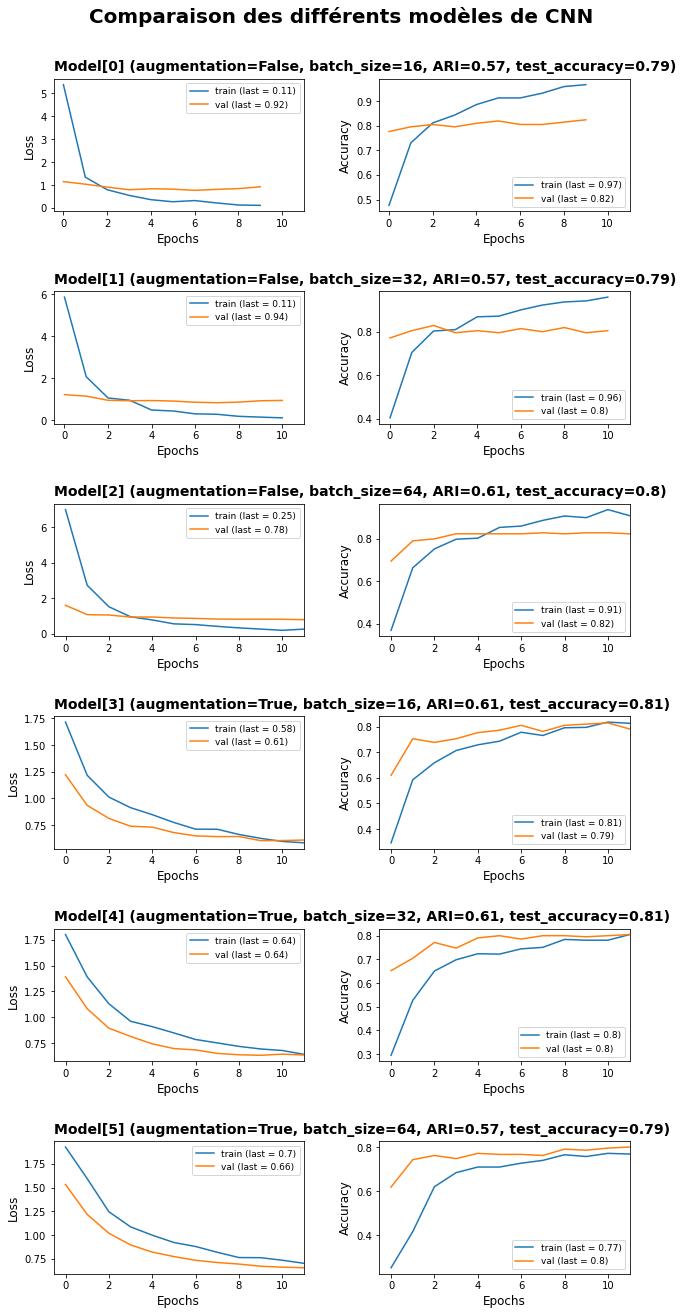

In [61]:
plots()

## Final step : 15 epochs with best model + save results

In [63]:
def create_model_fct3(augmentation=True, loss="categorical_crossentropy", optimizer='adam', 
                      batch_size=32, epochs=25, monitor='val_loss'):
    temps1 = time.time()
    #monitor : val_accuracy or val_loss with mode='max" or 'min if val_loss    
    # #"""loss = categorical_crossentropy or sparse_categorical_crossentropy"""
    # optimze = adam or rmsprop
    # Data augmentation
    data_augmentation = Sequential([
        RandomFlip("horizontal", input_shape=(224, 224, 3)),
        RandomRotation(0.1),
        RandomZoom(0.1),
        # Rescaling(1./127.5, offset=-1.0)
      ])
    
    # Récupération modèle pré-entraîné
    model_base = VGG16(include_top=False, weights="imagenet", input_shape=(224, 224, 3))
    for layer in model_base.layers:
        layer.trainable = False

    # Définition du nouveau modèle
    if augmentation==True:
        model = Sequential([
                    data_augmentation,
                    Rescaling(1./127.5, offset=-1),
                    model_base,
                    GlobalAveragePooling2D(),
                    Dense(256, activation='relu'),
                    Dropout(0.5),
                    Dense(7, activation='softmax') # 7 = df4.Class.nunique()
                    ])
    else:
        # Récupérer la sortie de ce réseau
        x = model_base.output
        # Compléter le modèle
        x = GlobalAveragePooling2D()(x)
        x = Dense(256, activation='relu')(x)
        x = Dropout(0.5)(x)
        predictions = Dense(7, activation='softmax')(x)
        # Définir le nouveau modèle
        with tf.device('/gpu:0'):
            model = Model(inputs=model_base.input, outputs=predictions)

    # compilation du modèle 
    model.compile(loss=loss, optimizer=optimizer, metrics=["accuracy"])
    #print(model.summary()) 

    # Création du callback
    model_save_path = f"{path_to_dir}\\model_best_weights.h5"
    if monitor=='val_accuracy':
        checkpoint = ModelCheckpoint(model_save_path, monitor=monitor, verbose=1, save_best_only=True, mode='max')
        reduce_lr = ReduceLROnPlateau(monitor=monitor, factor=0.2,
                              patience=3, min_lr=0.0001)
        es = EarlyStopping(monitor=monitor, mode='max', verbose=1, patience=5)
    else:
        checkpoint = ModelCheckpoint(model_save_path, monitor=monitor, verbose=1, save_best_only=True, mode='min')
        reduce_lr = ReduceLROnPlateau(monitor=monitor, factor=0.2,
                              patience=3, min_lr=0.0001)
        es = EarlyStopping(monitor=monitor, mode='min', verbose=1, patience=5)

    callbacks_list = [checkpoint, es, reduce_lr]

    # Entraîner sur les données d'entraînement (X_train, y_train)
    with tf.device('/gpu:0'): 
        history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, 
                       callbacks=callbacks_list, validation_data=(X_val, y_val), verbose=1)

    model = tf.keras.models.load_model(model_save_path)   
    #show_history(history)
    #plot_history(history, path=f"{path_to_dir}\\Images\\Results_ML-classification(augmentation={augmentation}).png")
    #plt.close()

    # Define ARI
    #y_test_num = np.argmax(y_test, axis=1)
    y_test_pred = np.argmax(model.predict(X_test2), axis=1)
    #y_test_num = np.argmax(y_test, axis=1)
    ARI = np.round(adjusted_rand_score(y_test, y_test_pred),3)

    test_accuracy = accuracy_score(y_test_pred, y_test)

    duration1= np.round(time.time()-temps1, 0)

    return ARI, duration1, history.history, test_accuracy

In [64]:
ARI_final, duration_final, history_final, test_acc_final = create_model_fct3()

Epoch 1/25
20/20 [==============================] - ETA: 0s - loss: 1.8814 - accuracy: 0.2635
Epoch 1: val_loss improved from inf to 1.37531, saving model to c:\Users\denis\OneDrive\Documents\Denis\Formation_OpenClassRooms\Projet6\model_best_weights.h5
20/20 [==============================] - 149s 8s/step - loss: 1.8814 - accuracy: 0.2635 - val_loss: 1.3753 - val_accuracy: 0.7190 - lr: 0.0010
Epoch 2/25
20/20 [==============================] - ETA: 0s - loss: 1.3582 - accuracy: 0.5524
Epoch 2: val_loss improved from 1.37531 to 1.04348, saving model to c:\Users\denis\OneDrive\Documents\Denis\Formation_OpenClassRooms\Projet6\model_best_weights.h5
20/20 [==============================] - 148s 7s/step - loss: 1.3582 - accuracy: 0.5524 - val_loss: 1.0435 - val_accuracy: 0.7667 - lr: 0.0010
Epoch 3/25
20/20 [==============================] - ETA: 0s - loss: 1.1298 - accuracy: 0.6460
Epoch 3: val_loss improved from 1.04348 to 0.88236, saving model to c:\Users\denis\OneDrive\Documents\Denis\Fo

In [65]:
#ARI_final, duration_final, history_final, test_acc_final

data2 = {"ARI_final":[ARI_final], 'duration_final':[duration_final], 'history_final':[history_final], 'test_acc_final':[test_acc_final]}

In [66]:
df10 = pd.DataFrame.from_dict(data2)

In [67]:
df10

,ARI_final,duration_final,history_final,test_acc_final
0,0.6,3630.0,"{'loss': [1.8814250230789185, 1.35816895961761...",0.809524


In [69]:
df10.to_csv('df10_final.csv', sep=';', index=False)

In [70]:
df11 = pd.read_csv('df10_final.csv', sep=';',quotechar='"')

In [78]:
df11

,ARI_final,duration_final,history_final,test_acc_final
0,0.6,3630.0,"{'loss': [1.8814250230789185, 1.35816895961761...",0.809524


In [77]:
df11.history_final = df11.history_final.apply(lambda x : ast.literal_eval(x))

In [105]:
def plots2(table = df11):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 4))
    ARI = round(table.at[0,'ARI_final'], 2)
    test = round(table.at[0,'test_acc_final'], 2)
    fig.suptitle(f'Model[4] (augmentation=True, batch_size=32, ARI={ARI}, test_accuracy={test})', fontsize = 20, fontweight = 'bold')
    e = round(table.history_final[0]['loss'][-1], 2)
    f = round(table.history_final[0]['val_loss'][-1], 2)
    ax1.plot(table.history_final[0]['loss'])
    ax1.plot(table.history_final[0]['val_loss'])
    #ax1.set_xlim(right=11)
    ax1.set_xlabel('Epochs', fontsize = 12) #, fontweight = 'bold')
    ax1.set_ylabel('Loss', fontsize = 12) #, fontweight = 'bold')
    ax1.legend([f'train (last = {e})', f'val (last = {f})'], loc='upper right', prop={'size': 9}) #prop={'size': 9}, 
        #ax1.set_title(f'Model[{0}] (augmentation={a}, batch_size={b}, ARI={ARI}, test_accuracy={test})', 
         #                   fontsize = 14, pad = 8, fontweight = 'bold', loc='left')

    c = round(table.history_final[0]['accuracy'][-1], 2)
    d = round(table.history_final[0]['val_accuracy'][-1], 2)
    ax2.plot(table.history_final[0]['accuracy'])
    ax2.plot(table.history_final[0]['val_accuracy'])
    #ax2.set_xlim(right=11)
    ax2.set_xlabel('Epochs', fontsize = 12) #, fontweight = 'bold')
    ax2.set_ylabel('Accuracy', fontsize = 12) #, fontweight = 'bold')
    ax2.legend([f'train (last = {c})', f'val (last = {d})'], loc='lower right', prop={'size': 9}) #prop={'size': 9}, 
        #ax2.set_title('Model accuracy', fontsize = 16, pad = 20, fontweight = 'bold')
    plt.subplots_adjust(left=0,
                    bottom=0.1,
                    right=1,
                    top=0.8,
                    wspace=0.3,
                    hspace=0.6)
    return plt.show()

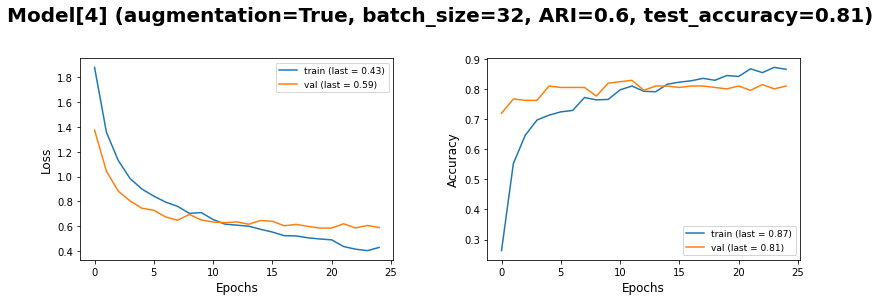

In [106]:
plots2()